# Visualize ELM Results and Differences In Key Variables
- Purpose: Want to visualize the differences of model outputs

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.colors import TwoSlopeNorm


print("All modules imported :)")

All modules imported :)


### Function to fix the format of the time in the output netcdfs (from C.Bachand):

In [3]:
# Make time as "datetime" objects rather than as "cftime" objects, which are more difficult to work with 
def fix_time(data):
    # First date in output 
    start = datetime(1850, 1, 1, 0) 
    # Creating an array of times beginning with 1850-01-01
    # Leap days are automatically included when using date times 
    times = [start + timedelta(int(i)) for i in np.arange(len(data.time) + 6)]
    # Remove leap days 
    times = [t for t in times if ((t.month != 2) | (t.day != 29))]
    data['time'] = times
    return data

### Read in ELM combined outputs:

In [4]:
output_folder = '/mnt/output/cime_run_dirs/' ##add case name and update path to ELM Output
 
baseline = fix_time(xr.open_dataset(output_folder + 'ELM_output_arctic_init.nc')) ###output of model using standard forcings and a surffile updated with some watershed level characteristics (pft, elevation, etc.)

temp_scale = fix_time(xr.open_dataset(output_folder + 'ELM_output_scale_temp3.nc'))
rain_snow_scale = fix_time(xr.open_dataset(output_folder +'ELM_output_scale_rain40_snow60.nc'))
temp_snow_rain_scale = fix_time(xr.open_dataset(output_folder + 'ELM_output_scale_rain40_snow60_temp3.nc')) #ELM_output_rain40_snow60_temp3_gswp3.nc ELM_output_rain40_snow60_temp3

### Map ELM naming convention (for user interpretation, and later intuitive plot labeling):

In [4]:
elm_name_map = {"SNOW_DEPTH":"Snow Depth",
               "H2OSNO" : "Snow Water Equivalent",
               'ALT': "Active Layer Thickness",
               "TSOI": "Soil Temperature",
               "GPP": "Gross Primary Productivity",
               "H2OSOI": "Soil Moisture Content",
               "HTOP": "Canopy Height"}

## How does increasing temperature and precipitation impact snow and soil temperature variables? 

### Plot snow depth

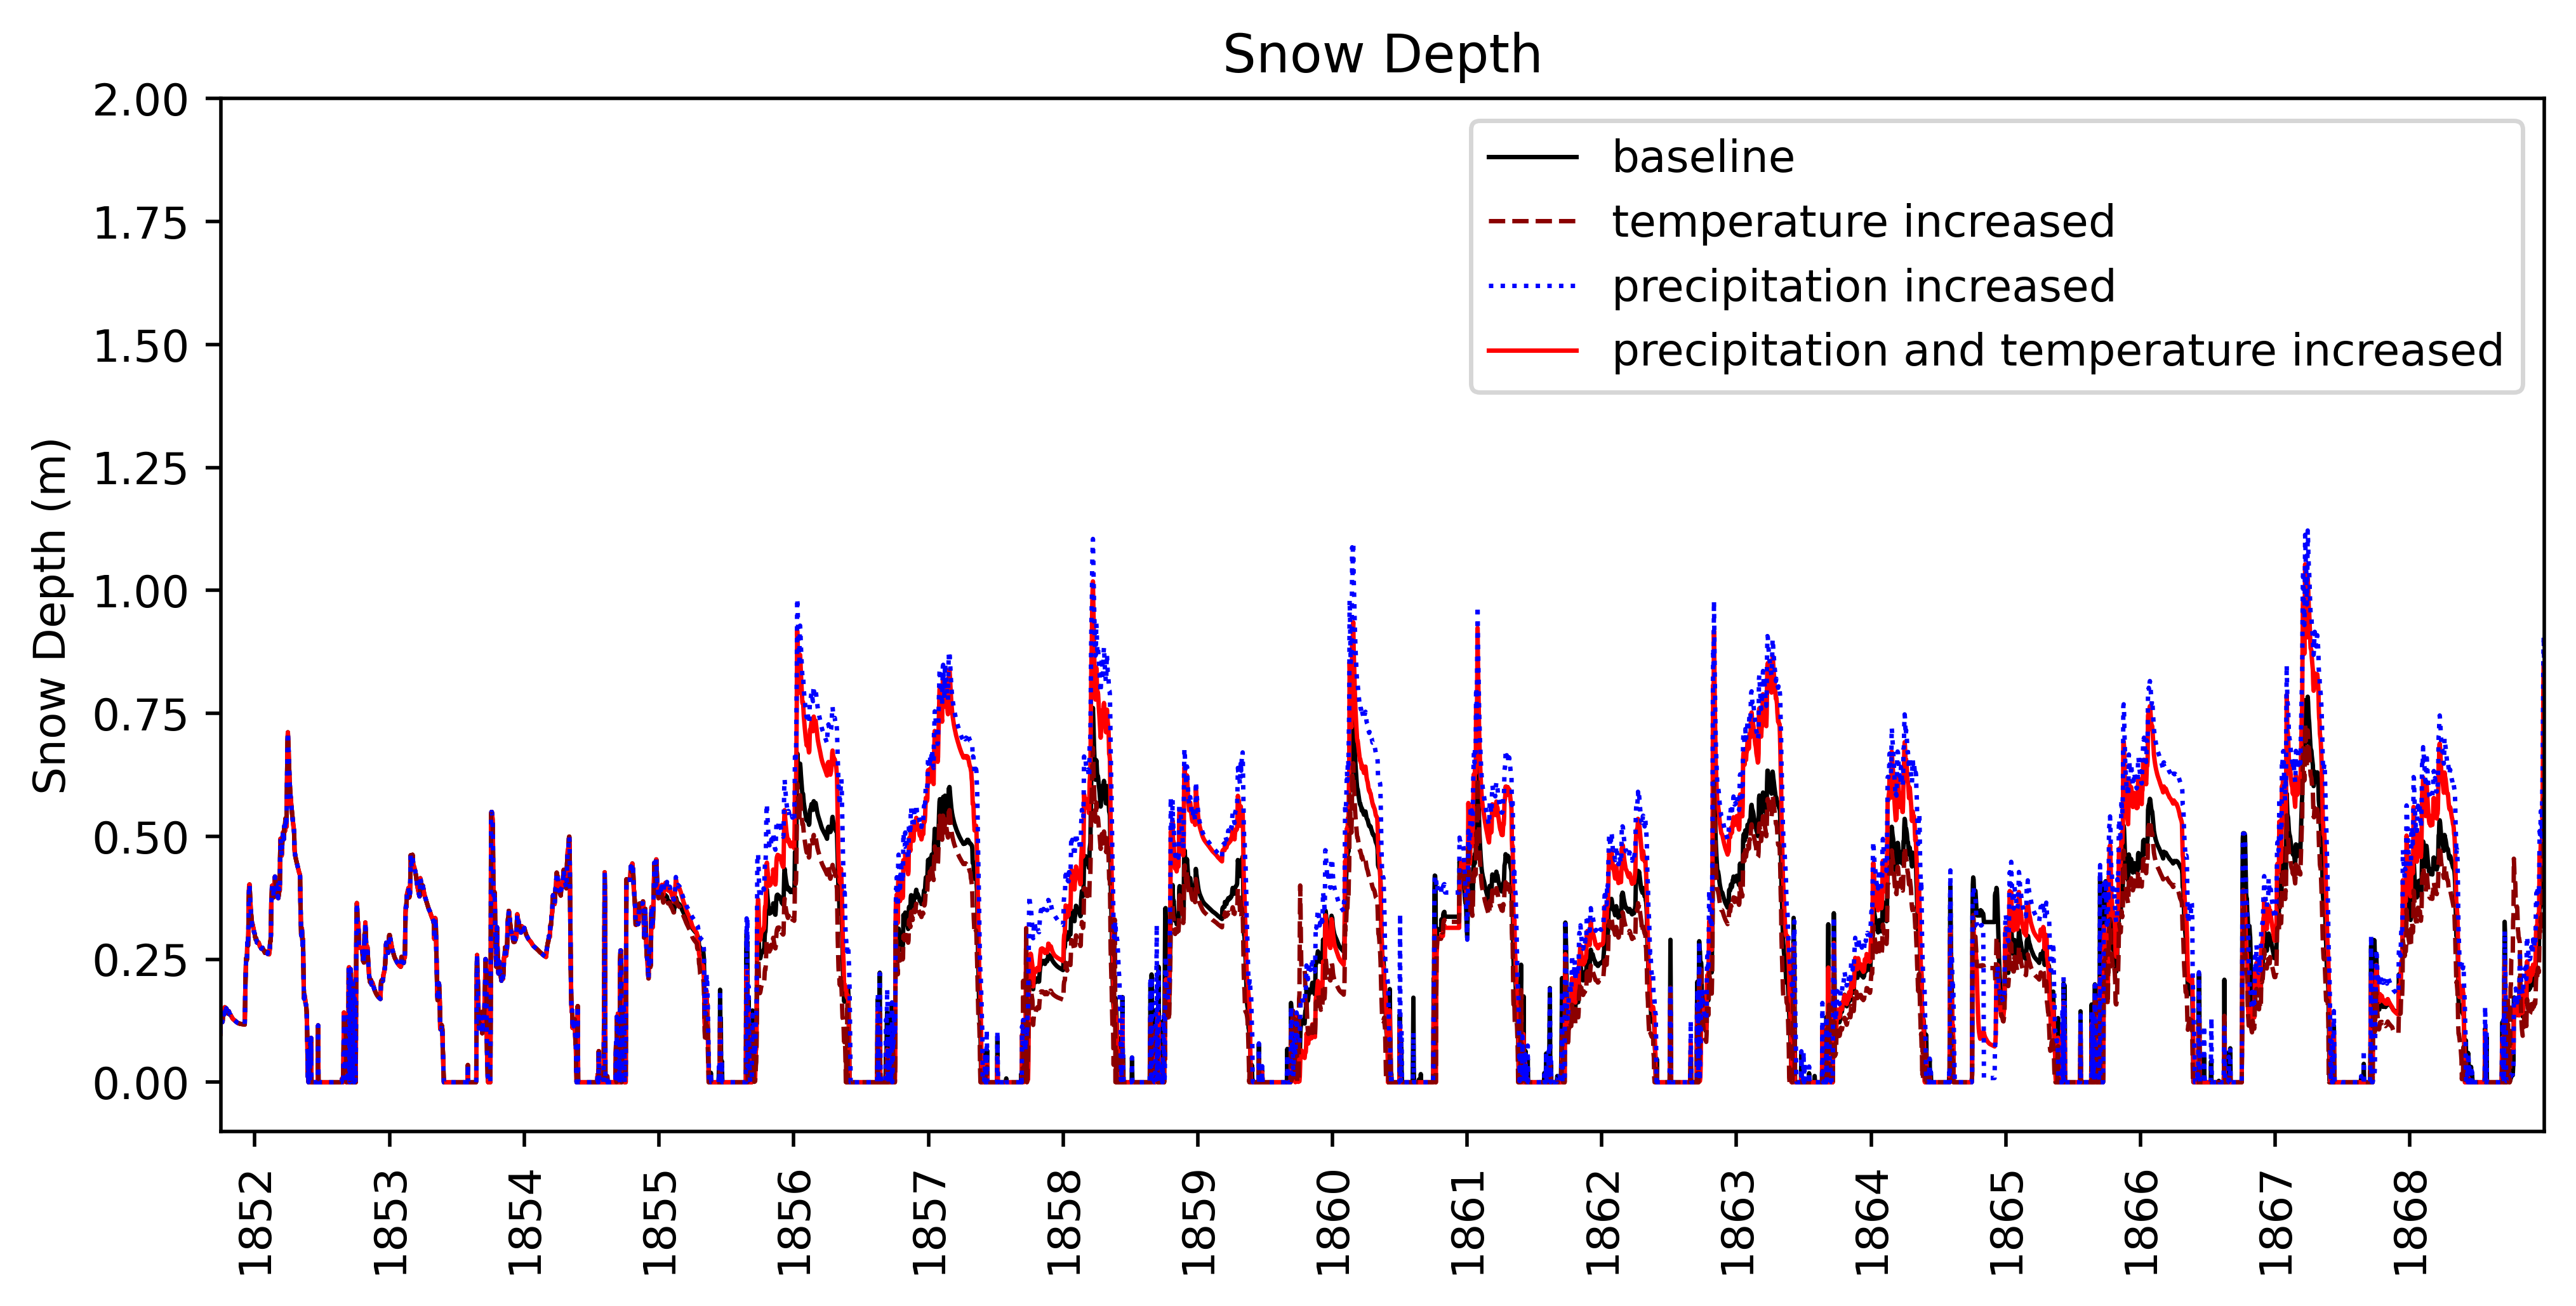

In [5]:
var = 'SNOW_DEPTH'
fig, ax = plt.subplots(1, figsize = [8, 4], dpi = 500, constrained_layout = True)
ax.plot(baseline.time, baseline[var], label = 'baseline', color = 'black', lw = 1, zorder = 1)
ax.plot(temp_scale.time, temp_scale[var], label = 'temperature increased', color= 'darkred', ls = '--', lw = 1, zorder = 2)
ax.plot(rain_snow_scale.time, rain_snow_scale[var], label = 'precipitation increased', color = 'blue', ls = ':', lw = 1, zorder = 2)
ax.plot(temp_snow_rain_scale.time, temp_snow_rain_scale[var], label = 'precipitation and temperature increased', 
        color = 'red', lw = 1, zorder = 1)
ax.set_ylabel('Snow Depth (m)')
ax.set_ylim([-0.1, 2])
ax.set_title(elm_name_map[var])
ticks = [datetime(y, 1, 1) for y in np.arange(1852, 1869)]
ax.set_xticks(ticks)
ax.set_xticklabels([d.year for d in ticks], rotation = 90)
ax.set_xlim([datetime(1851, 10, 1), datetime(1868, 12, 31)])
ax.legend()

### Plot snow water equivalent

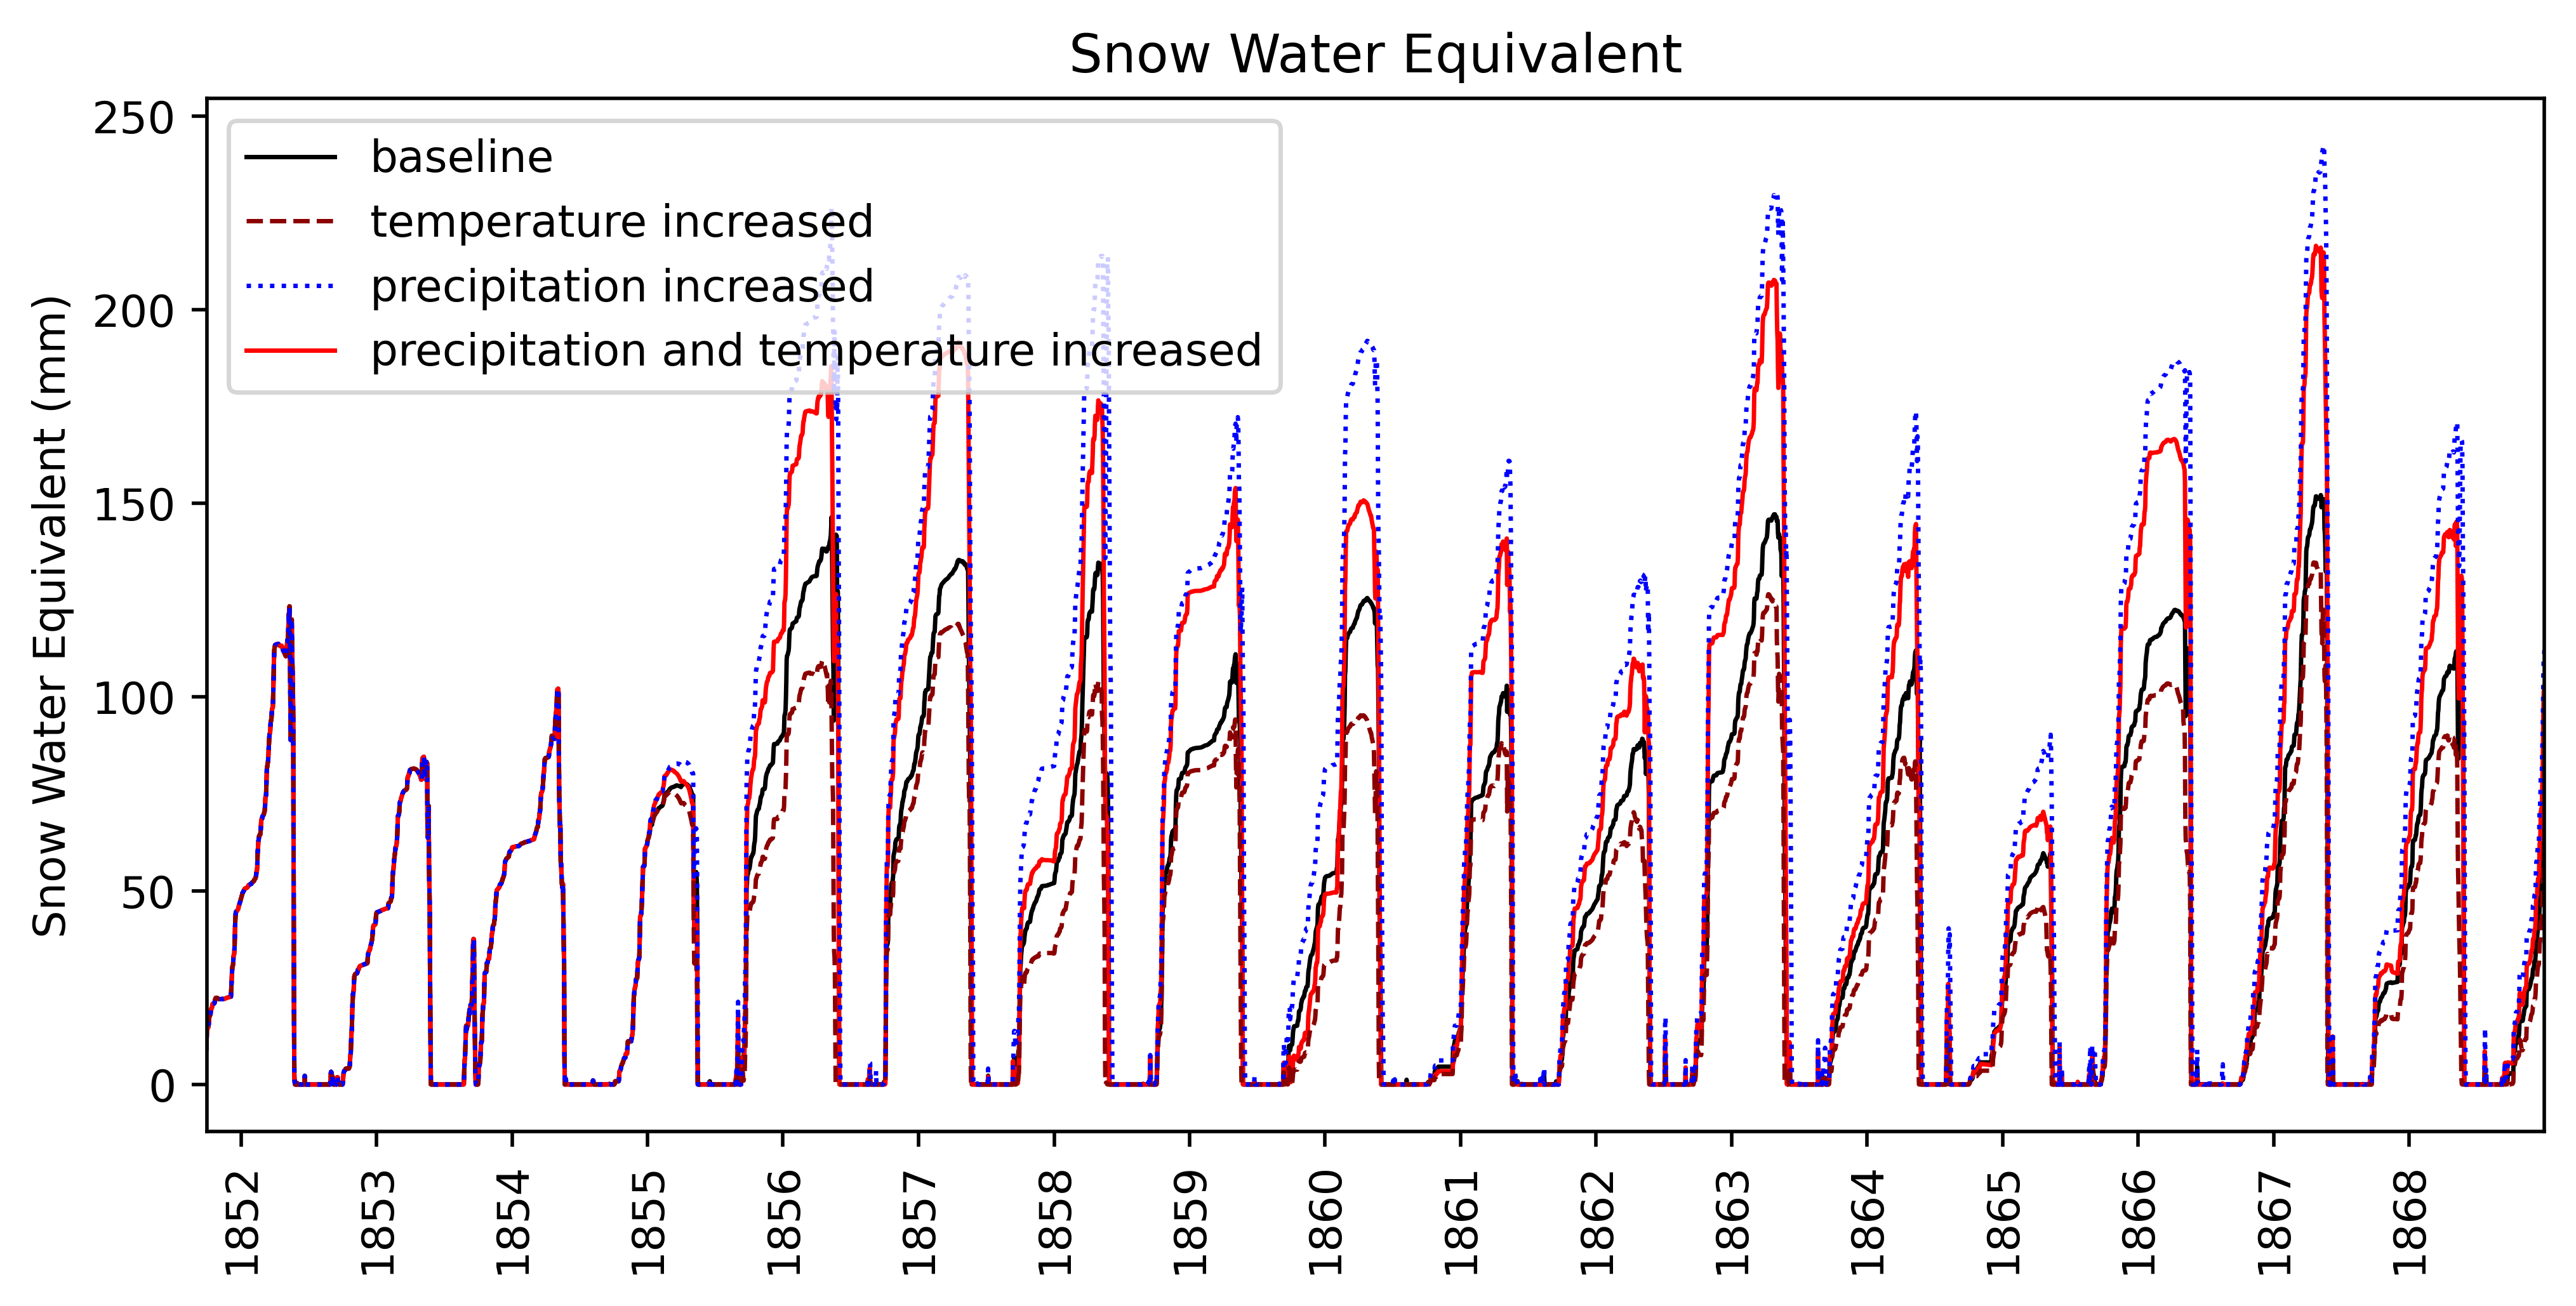

In [6]:
var = 'H2OSNO'
fig, ax = plt.subplots(1, figsize = [8, 4], dpi = 500, constrained_layout = True)
ax.plot(baseline.time, baseline[var], label = 'baseline', color = 'black', lw = 1, zorder = 1)
ax.plot(temp_scale.time, temp_scale[var], label = 'temperature increased', color= 'darkred', ls = '--', lw = 1, zorder = 2)
ax.plot(rain_snow_scale.time, rain_snow_scale[var], label = 'precipitation increased', color = 'blue', ls = ':', lw = 1, zorder = 2)
ax.plot(temp_snow_rain_scale.time, temp_snow_rain_scale[var], label = 'precipitation and temperature increased', 
        color = 'red', lw = 1, zorder = 1)
ax.set_ylabel('Snow Water Equivalent (mm)')
ax.set_title(elm_name_map[var])
ticks = [datetime(y, 1, 1) for y in np.arange(1852, 1869)]
ax.set_xticks(ticks)
ax.set_xticklabels([d.year for d in ticks], rotation = 90)
ax.set_xlim([datetime(1851, 10, 1), datetime(1868, 12, 31)])
ax.legend()

### Plot active layer thickness

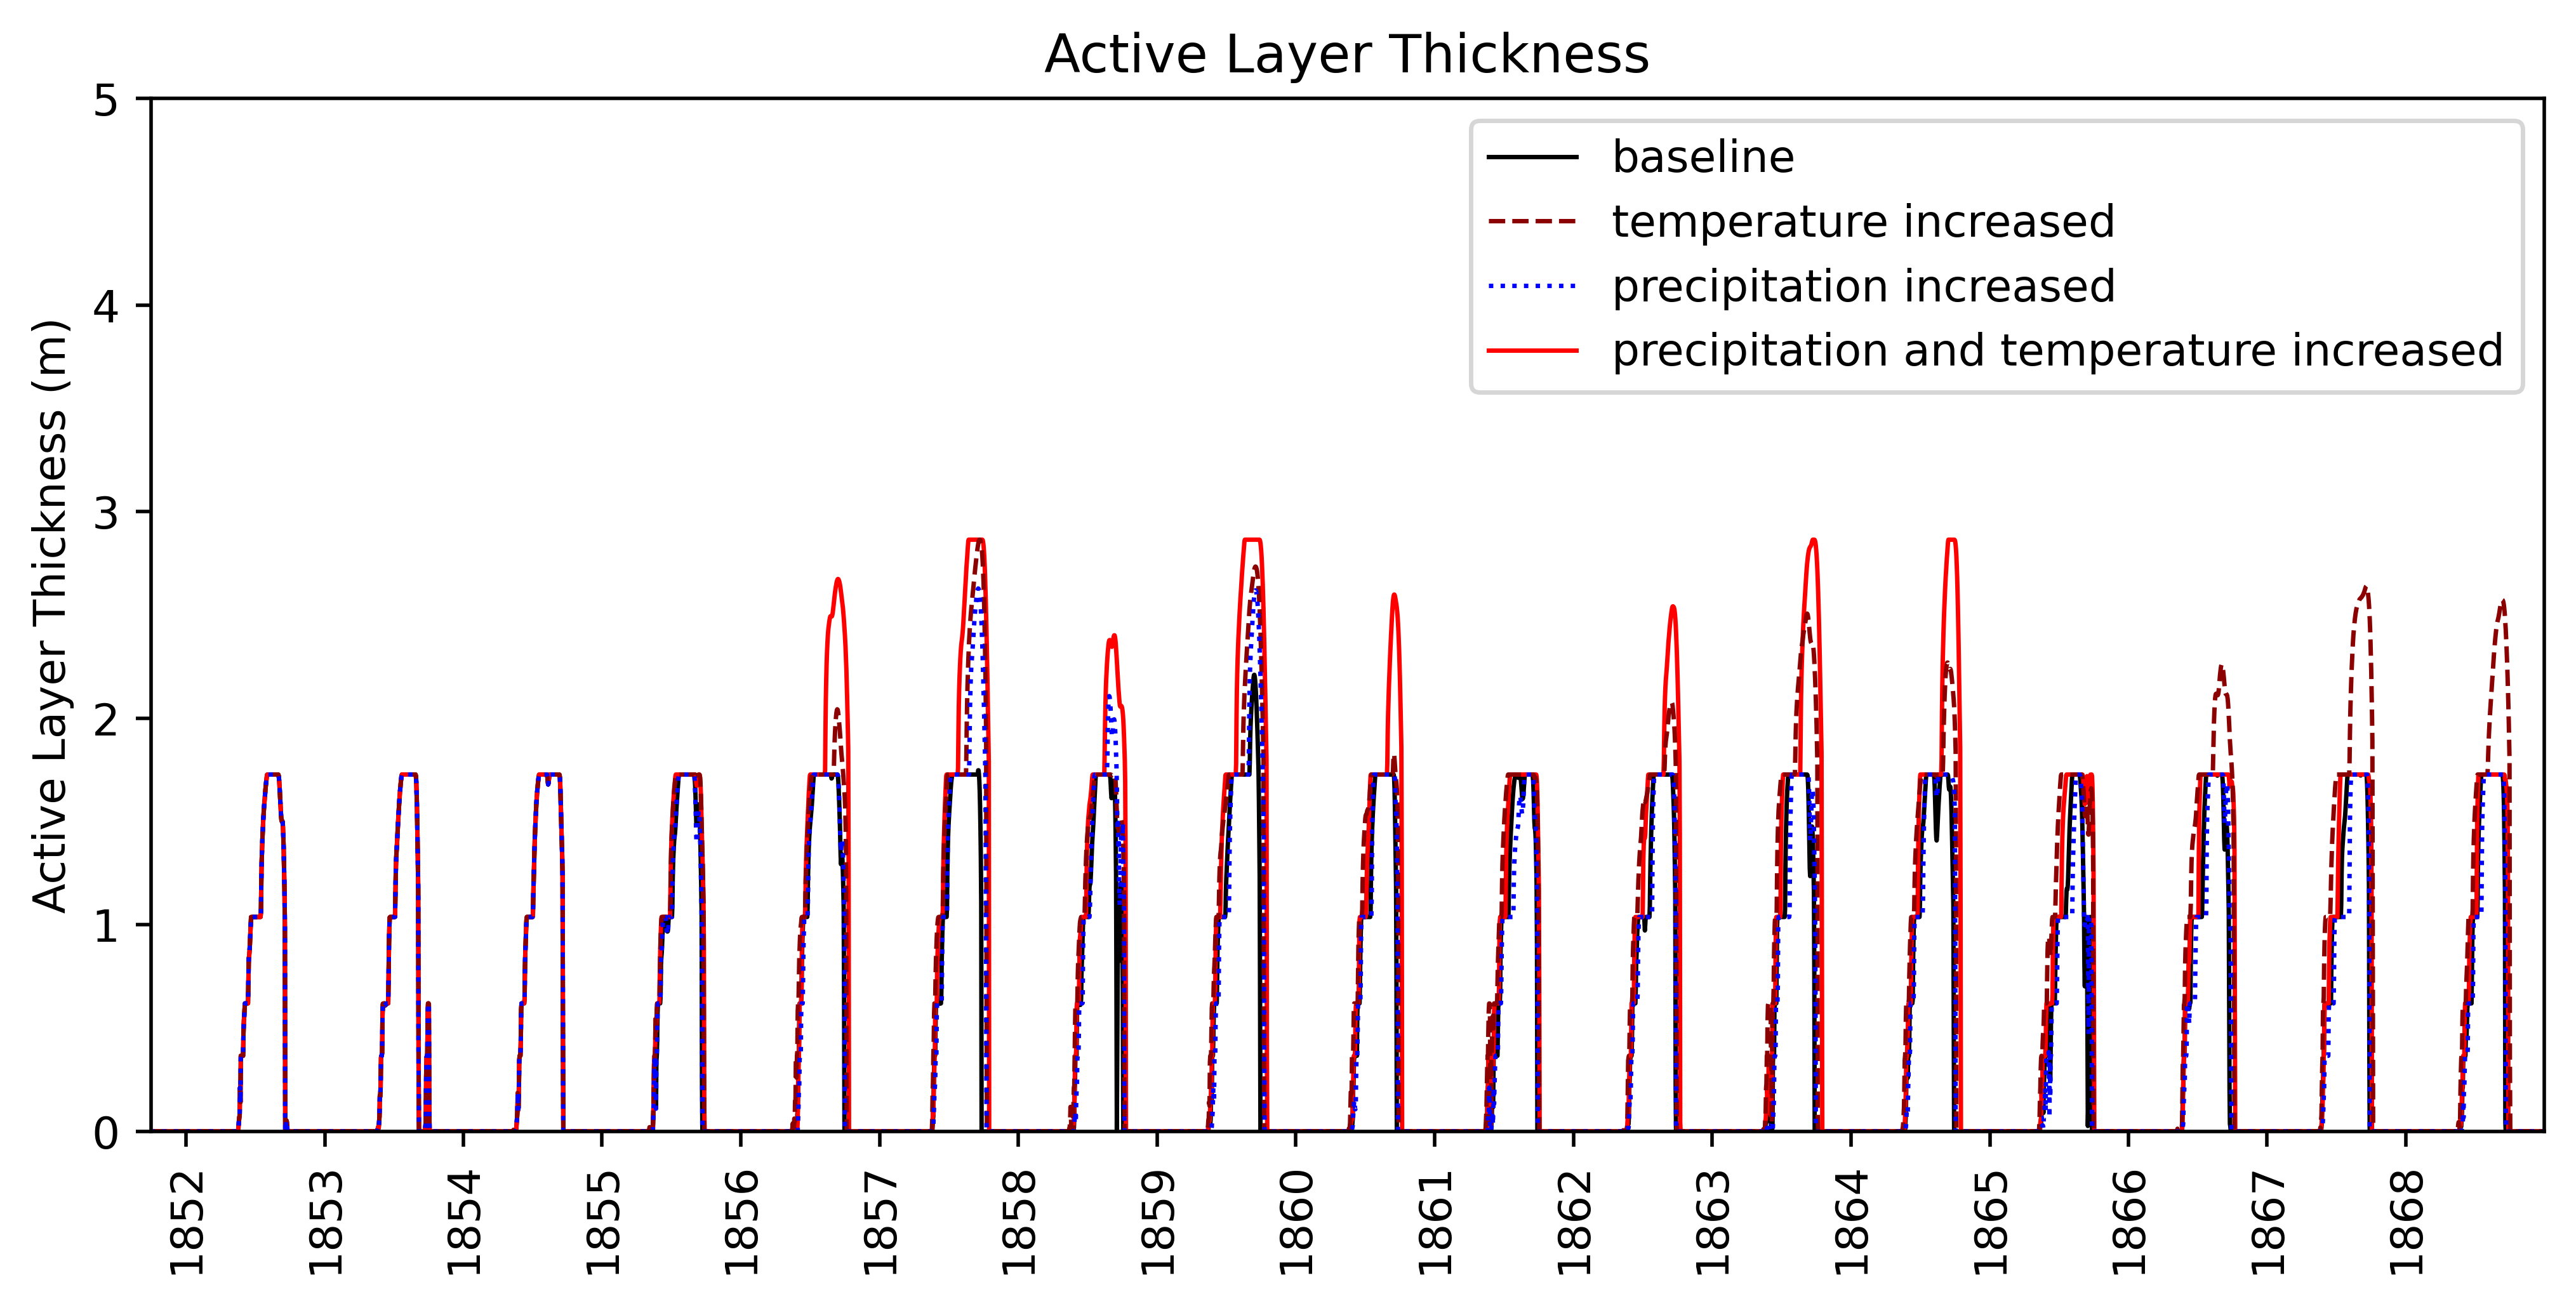

In [7]:
var = 'ALT'
fig, ax = plt.subplots(1, figsize = [8, 4], dpi = 500, constrained_layout = True)
ax.plot(baseline.time, baseline[var], label = 'baseline', color = 'black', lw = 1, zorder = 1)
ax.plot(temp_scale.time, temp_scale[var], label = 'temperature increased', color= 'darkred', ls = '--', lw = 1, zorder = 2)
ax.plot(rain_snow_scale.time, rain_snow_scale[var], label = 'precipitation increased', color = 'blue', ls = ':', lw = 1, zorder = 2)
ax.plot(temp_snow_rain_scale.time, temp_snow_rain_scale[var], label = 'precipitation and temperature increased', 
        color = 'red', lw = 1, zorder = 1)
ax.set_ylabel('Active Layer Thickness (m)')
ax.set_ylim([0, 5])
ax.set_title(elm_name_map[var])
ticks = [datetime(y, 1, 1) for y in np.arange(1852, 1869)]
ax.set_xticks(ticks)
ax.set_xticklabels([d.year for d in ticks], rotation = 90)
ax.set_xlim([datetime(1851, 10, 1), datetime(1868, 12, 31)])
ticks = [datetime(y, 1, 1) for y in np.arange(1852, 1869)]
ax.set_xticks(ticks)
ax.set_xticklabels([d.year for d in ticks], rotation = 90)
ax.legend()

### Plot soil temperature

Text(-0.02, 0.5, 'Soil depth (m)')

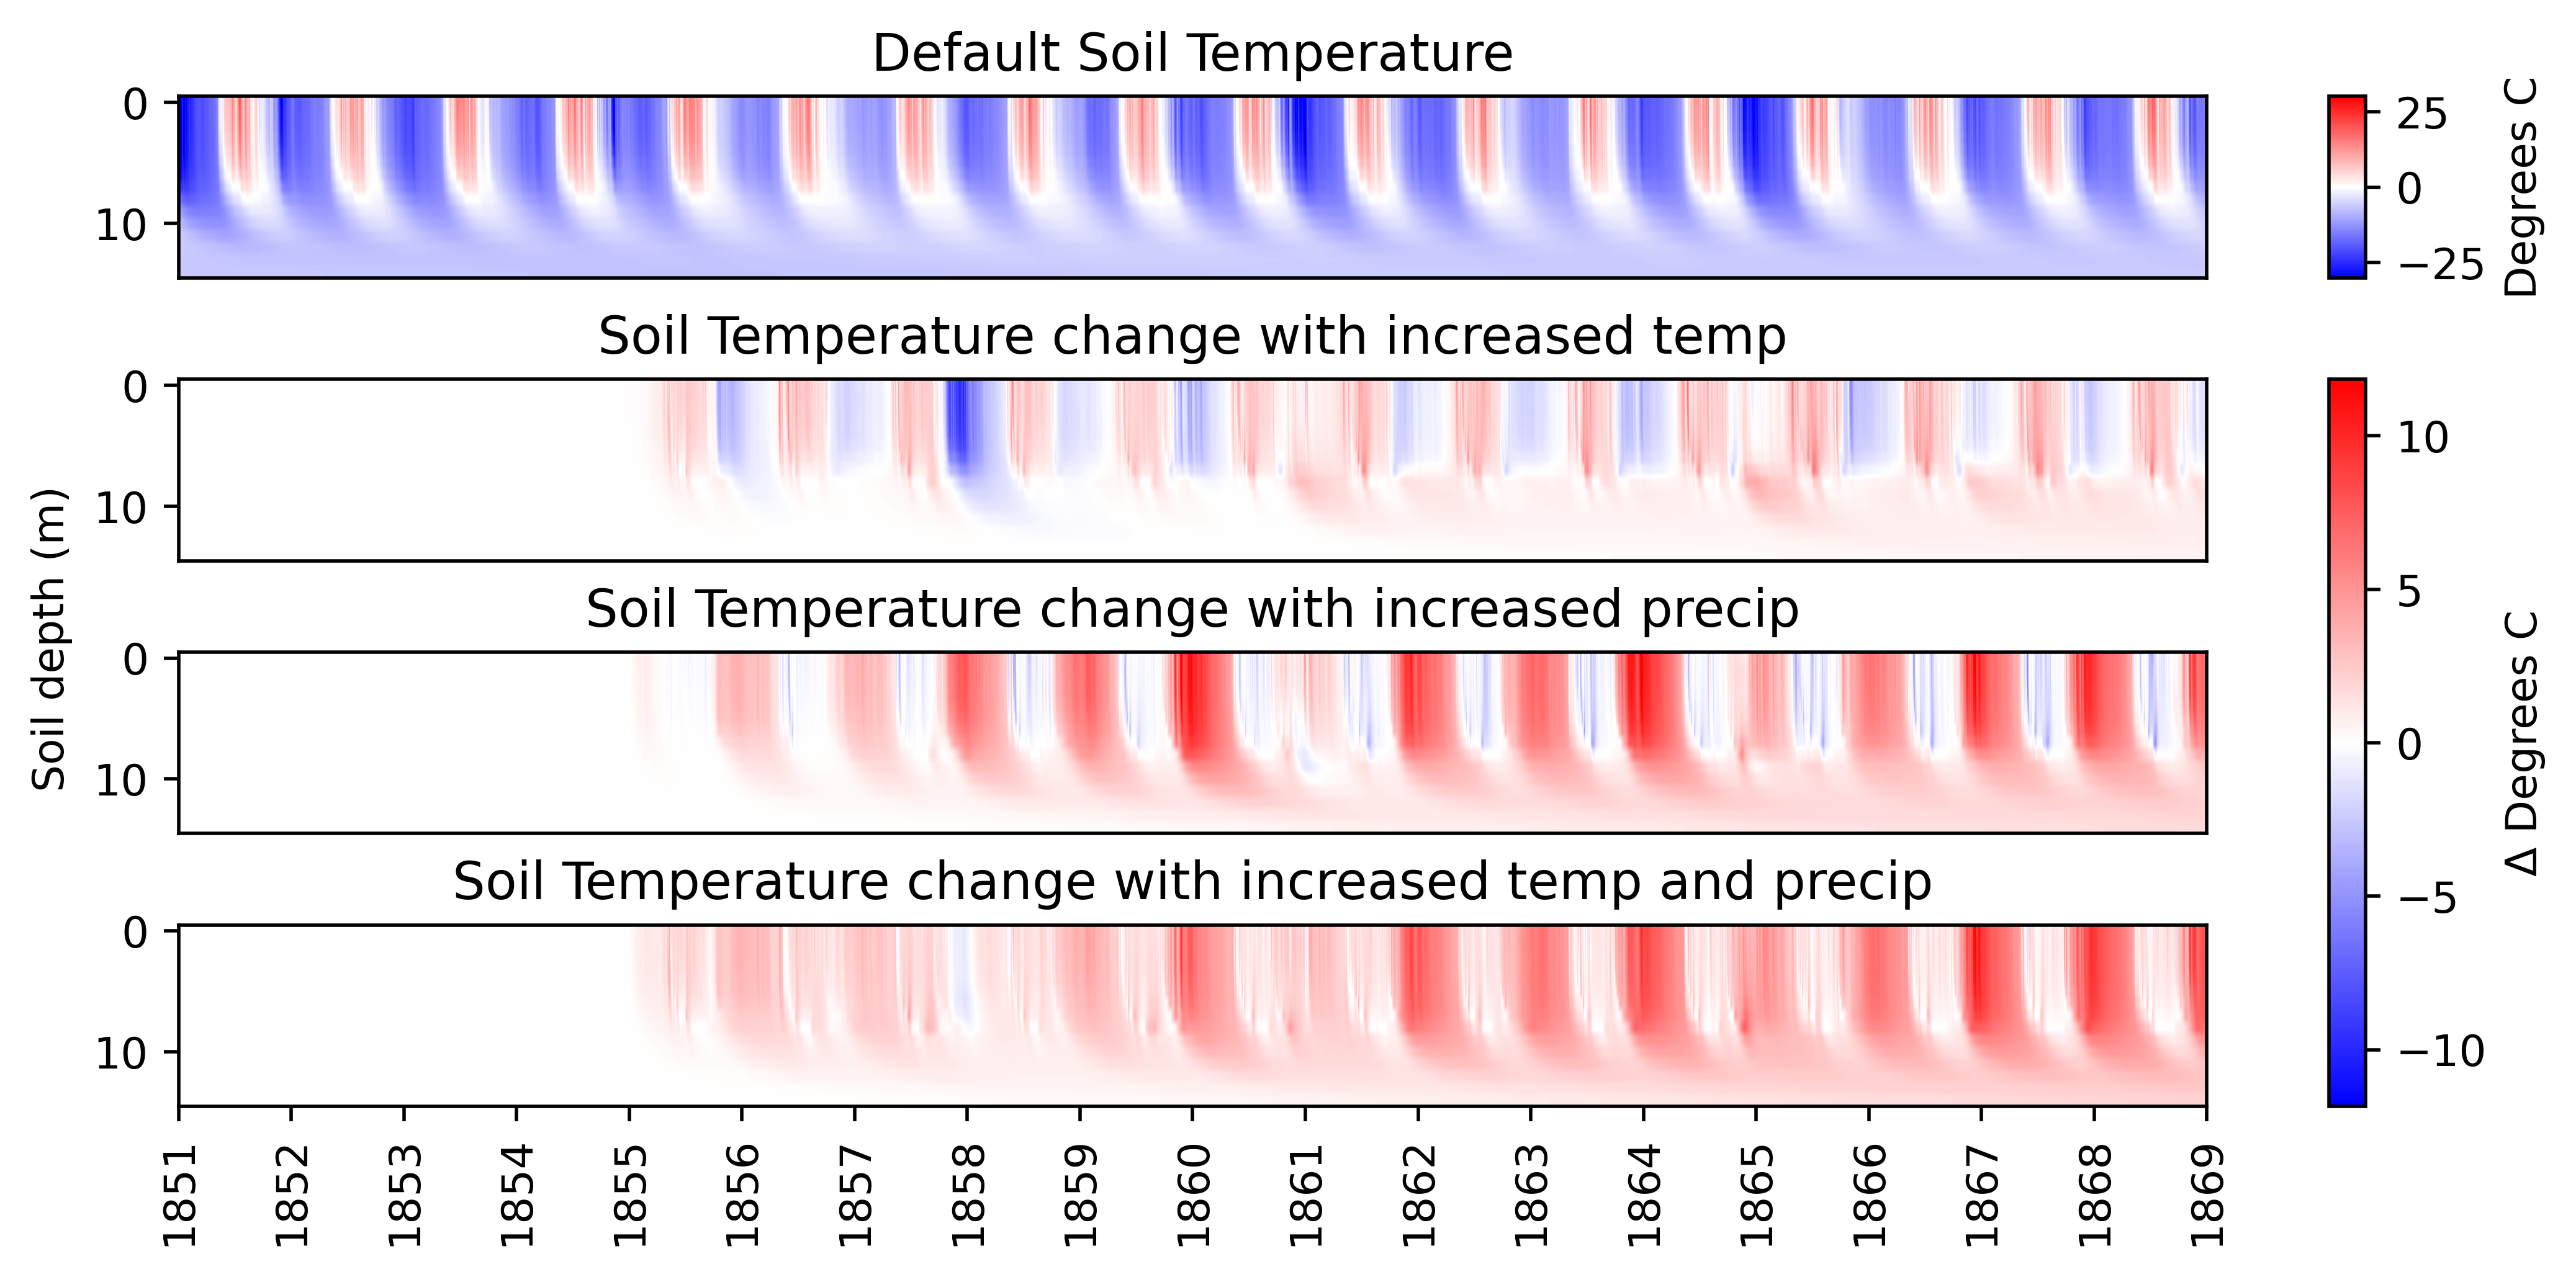

In [8]:
var = "TSOI"

fig, ax = plt.subplots(4, figsize = [8,4], dpi = 500, constrained_layout = True)
cmap = ax[0].imshow(np.transpose(baseline[var].squeeze().values - 273.15), aspect = 'auto', cmap = 'bwr', vmin = -30, vmax = 30)

dif1 = np.transpose(temp_scale[var].squeeze().values) - np.transpose(baseline[var].squeeze().values)
dif2 = np.transpose(rain_snow_scale[var].squeeze().values) - np.transpose(baseline[var].squeeze().values)
dif3 = np.transpose(temp_snow_rain_scale[var].squeeze().values) - np.transpose(baseline[var].squeeze().values)

# code to ensure the colorbar center value is at a neutral white color
vmin = dif3.min()
vmax = dif3.max()
vmax = max(np.abs(vmin), vmax)
vmin = vmax * -1


cmap2 = ax[1].imshow(dif1, aspect = 'auto', cmap = 'bwr', vmin = vmin, vmax = vmax)
ax[2].imshow(dif2, aspect = 'auto', cmap = 'bwr', vmin = vmin, vmax = vmax)
ax[3].imshow(dif3, aspect = 'auto', cmap = 'bwr', vmin = vmin, vmax = vmax)
plt.colorbar(cmap, ax = ax[0], aspect = 5, label = 'Degrees C')
plt.colorbar(cmap2, ax = ax[1:4], label = 'Δ Degrees C')
ax[0].set_title('Default ' + elm_name_map[var])
ax[1].set_title(elm_name_map[var] + ' change with increased temp')
ax[2].set_title(elm_name_map[var] + ' change with increased precip')
ax[3].set_title(elm_name_map[var] + ' change with increased temp and precip')
ticks = np.arange(0, len(baseline.time), 365)
ax[3].set_xticks(ticks)
ax[3].set_xticklabels(np.arange(0, len(ticks)) + 1850, rotation = 90)


for i in [0, 1, 2]:
    ax[i].set_xticks([])
for i in np.arange(4):
    ax[i].set_xlim([365, 365 * 19])
fig.text(-0.02, 0.5, 'Soil depth (m)', va='center', rotation='vertical')


### Plot soil moisture (colorbar flipped from the above)

Text(-0.02, 0.5, 'Soil depth (m)')

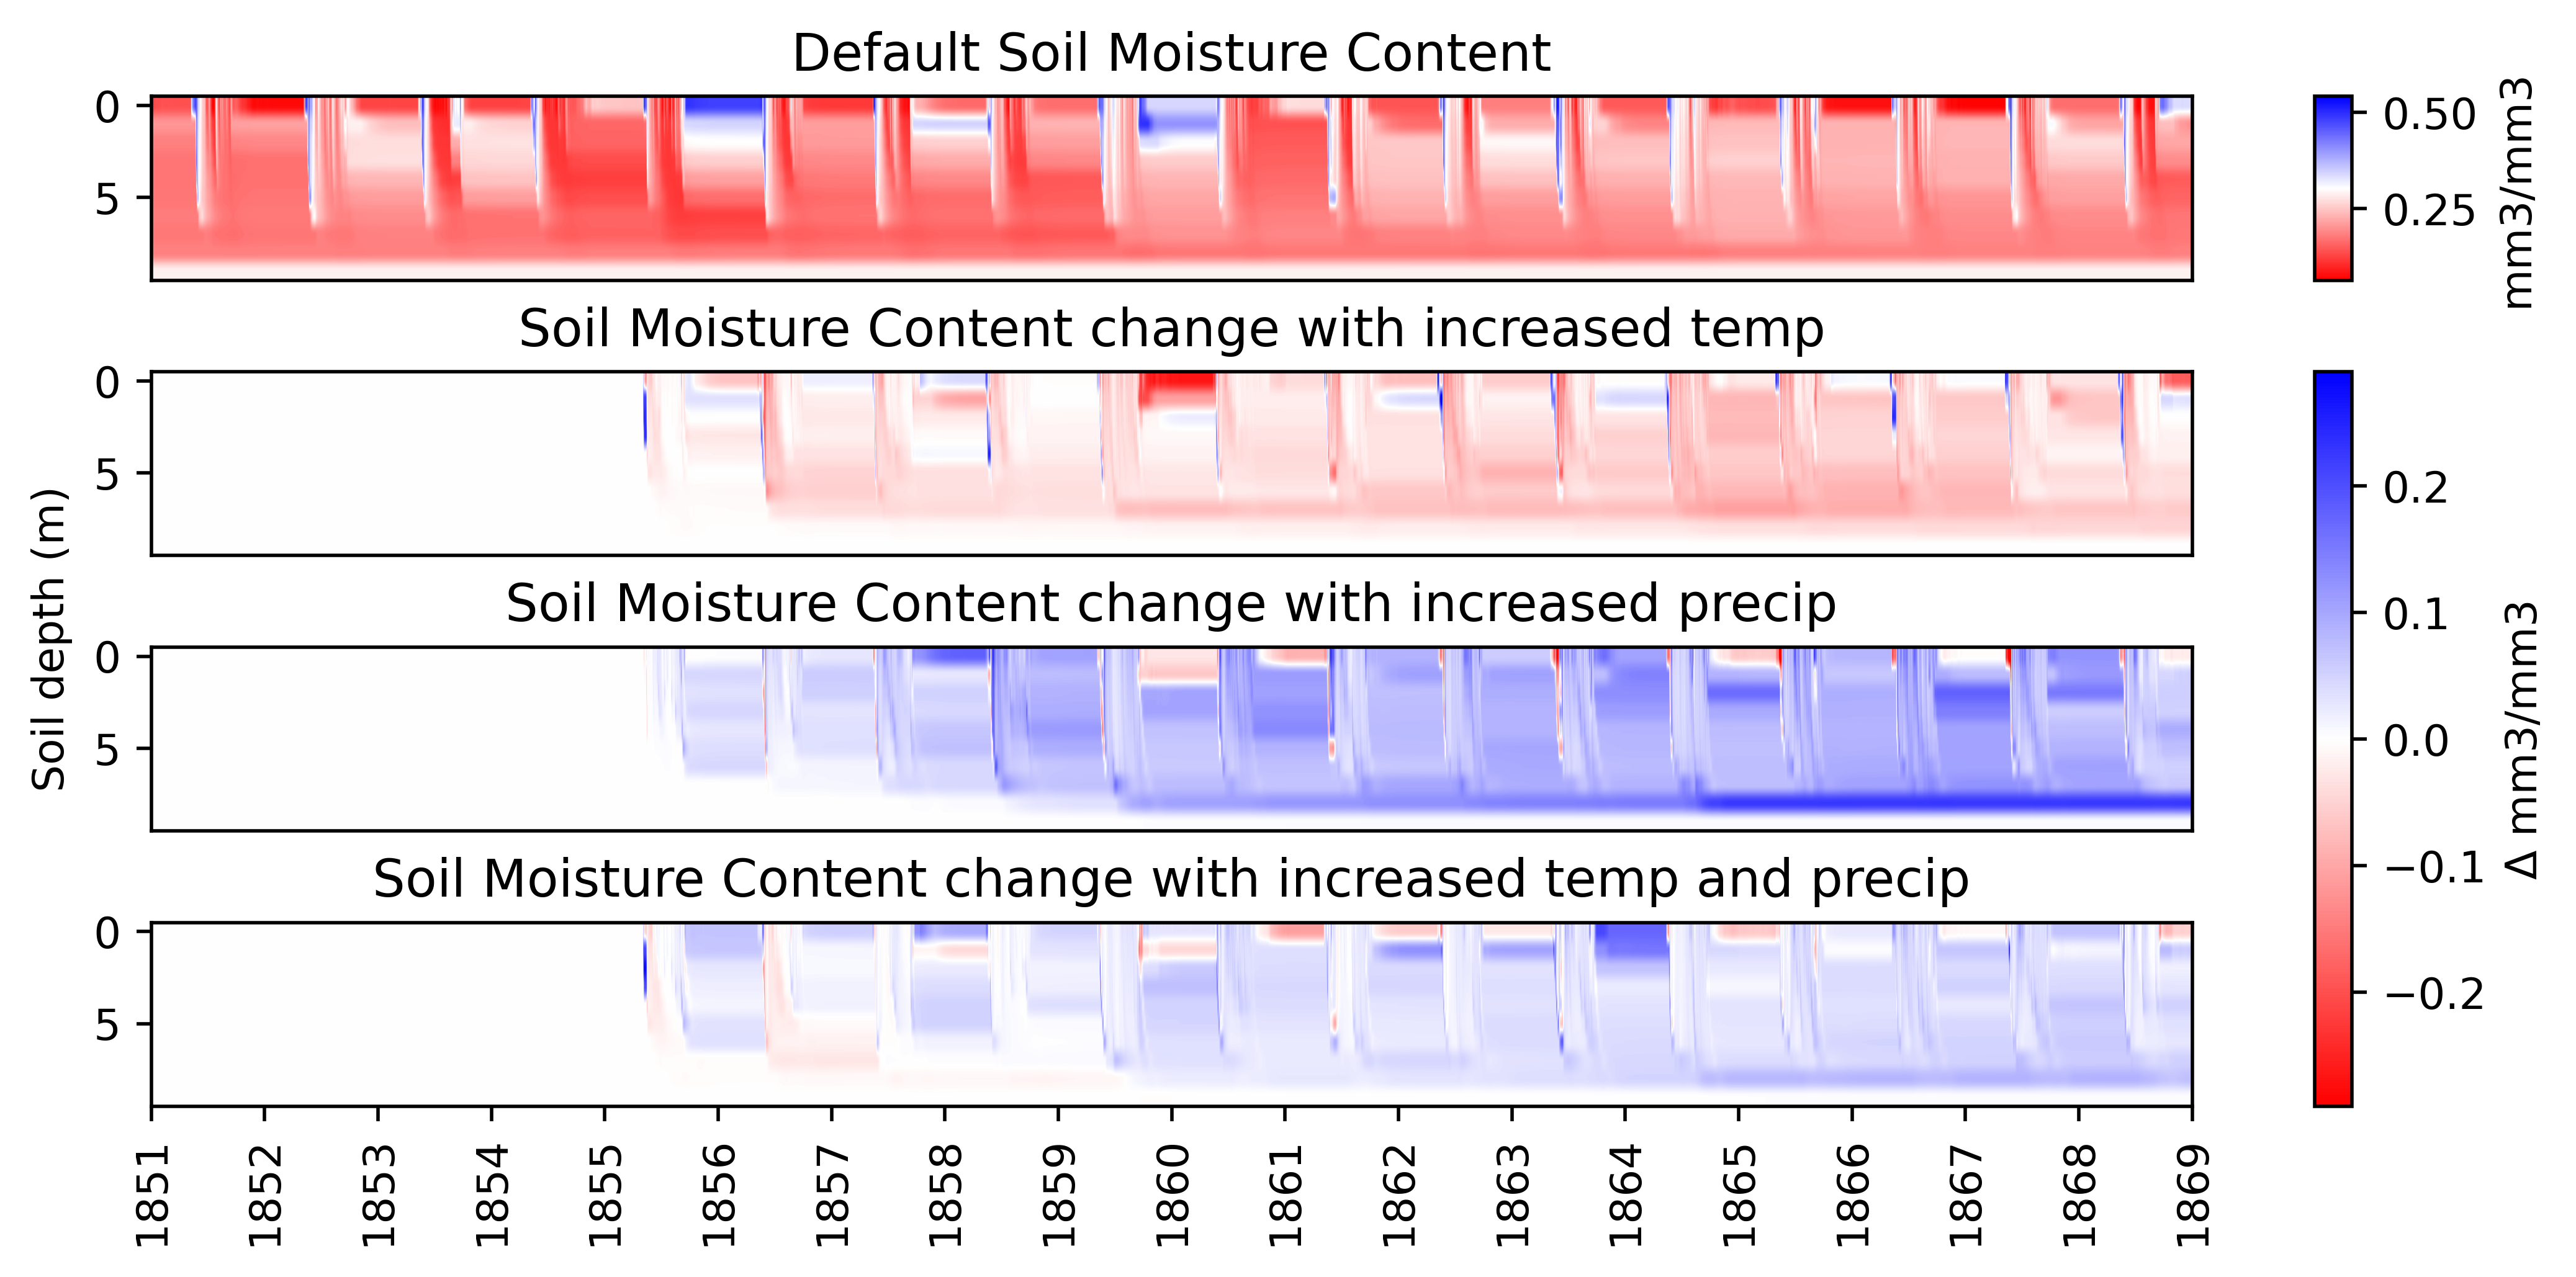

In [9]:
var = "H2OSOI"

nlev = 10
base = baseline[var].squeeze().isel(levgrnd=slice(0, nlev))
t1   = temp_scale[var].squeeze().isel(levgrnd=slice(0, nlev))
t2   = rain_snow_scale[var].squeeze().isel(levgrnd=slice(0, nlev))
t3   = temp_snow_rain_scale[var].squeeze().isel(levgrnd=slice(0, nlev))

units = base.attrs.get("units", "")

fig, ax = plt.subplots(4, figsize=[8,4], dpi=500, constrained_layout=True)

cmap  = ax[0].imshow(base.values.T, aspect="auto", cmap="bwr_r")

d1 = (t1 - base).values
d2 = (t2 - base).values
d3 = (t3 - base).values

# code to ensure the colorbar center value is at a neutral white color
vmin = d3.min()
vmax = d3.max()
vmax = max(np.abs(vmin), vmax)
vmin = vmax * -1

norm3 = TwoSlopeNorm(vmin=d3.min(), vcenter=0.0, vmax=d3.max())

cmap2 = ax[1].imshow(d1.T, aspect="auto", cmap="bwr_r", vmin = vmin, vmax = vmax)
ax[2].imshow(d2.T, aspect="auto", cmap="bwr_r", vmin = vmin, vmax = vmax)
ax[3].imshow(d3.T, aspect="auto", cmap="bwr_r", vmin = vmin, vmax = vmax)

# one colorbar for absolute, one for diffs
plt.colorbar(cmap,  ax=ax[0], aspect=5, label=(units or None))
plt.colorbar(cmap2, ax=ax[1:4], label=("Δ " + units if units else None))

ax[0].set_title('Default ' + elm_name_map[var])
ax[1].set_title(elm_name_map[var] + ' change with increased temp')
ax[2].set_title(elm_name_map[var] + ' change with increased precip')
ax[3].set_title(elm_name_map[var] + ' change with increased temp and precip')

ticks = np.arange(0, len(baseline.time), 365)
ax[3].set_xticks(ticks)
ax[3].set_xticklabels(np.arange(0, len(ticks)) + 1850, rotation=90)
for i in [0, 1, 2]:
    ax[i].set_xticks([])
for i in np.arange(4):
    ax[i].set_xlim([365, 365 * 19])

fig.text(-0.02, 0.5, "Soil depth (m)", va="center", rotation="vertical")